При виконанні пунктів 1 - 8 індивідуального завдання, значення змінних a, b, c, d і т.д. необхідно вибирати довільним чином.


In [1]:
import random

def genrand(n, i, j):
    rand_ints = random.sample(range(i, j + 1), n)
    return sorted(rand_ints)

def genMainSigma(i, j):
    main = random.randint(i, j)
    sigma = random.randint(1, 10)
    return main, sigma

def genTwoMainSigma(i, j):
    main1 = random.randint(i, j)
    sigma1 = random.randint(1, 10)
    main2 = random.randint(main1, j)
    sigma2 = random.randint(1, 10)
    return main1, sigma1, main2, sigma2

def genBell(i, j):
    width = random.randint(1, 10)
    slope = random.randint(1, 10)
    center = random.randint(i, j)
    return width, slope, center

def genCenterWidth(i, j):
    center = random.randint(i, j)
    a = random.randint(5, 15)
    width = a / 10 if a <= 10 else a - 10
    return center, width

1. Побудувати трикутну і трапецієподібну функцію приналежності.


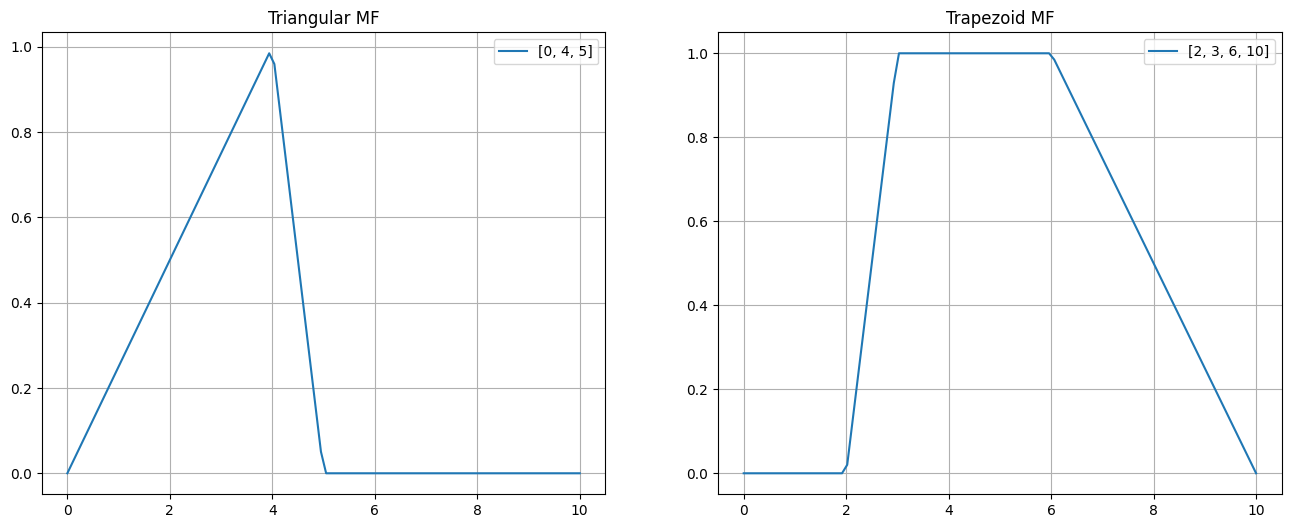

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True

x1min, x1max = 0, 10
x1 = np.linspace(x1min, x1max, 100)

triMFArr = genrand(3, x1min, x1max)
trapMFArr = genrand(4, x1min, x1max)

triMF = fuzz.trimf(x1, triMFArr)
trapMF = fuzz.trapmf(x1, trapMFArr)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(x1, triMF, label=str(triMFArr))
axes[1].plot(x1, trapMF, label=str(trapMFArr))

axes[0].set_title("Triangular MF")
axes[1].set_title("Trapezoid MF")

axes[0].legend()
axes[1].legend()

2. Побудувати просту і двосторонню функцію приналежності Гаусса, утворену за допомогою різних функцій розподілу.


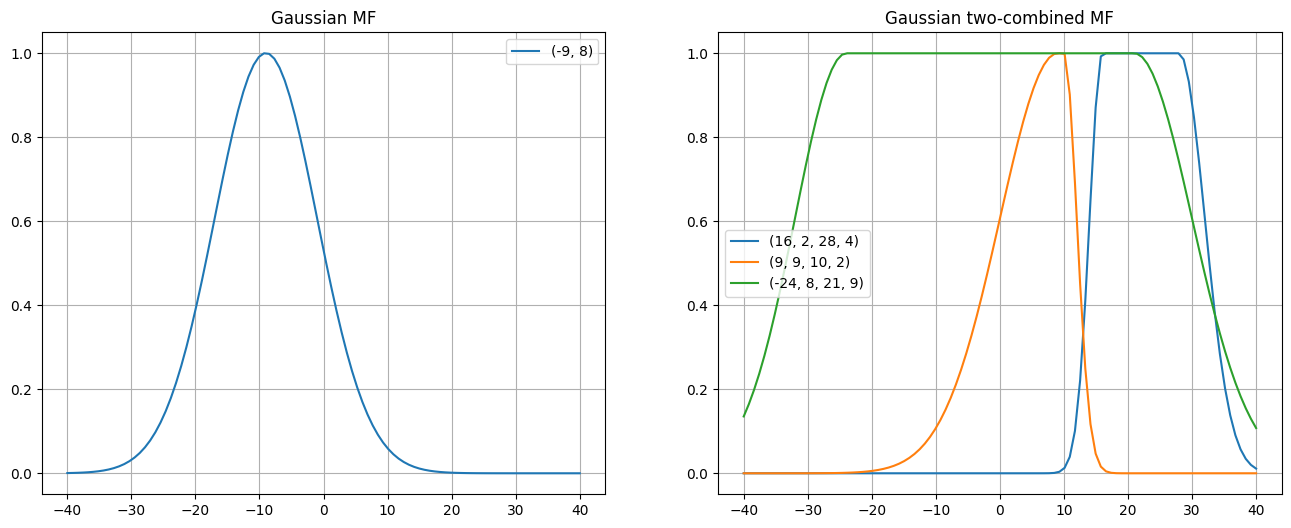

In [3]:
x2min, x2max = -40, 40
x2 = np.linspace(x2min, x2max, 100)

gaussArr = genMainSigma(x2min, x2max)
gauss21Arr = genTwoMainSigma(x2min, x2max)
gauss22Arr = genTwoMainSigma(x2min, x2max)
gauss23Arr = genTwoMainSigma(x2min, x2max)

gauss = fuzz.gaussmf(x2, *gaussArr)
gauss21 = fuzz.gauss2mf(x2, *gauss21Arr)
gauss22 = fuzz.gauss2mf(x2, *gauss22Arr)
gauss23 = fuzz.gauss2mf(x2, *gauss23Arr)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(x2, gauss, label=str(gaussArr))
axes[1].plot(x2, gauss21, label=str(gauss21Arr))
axes[1].plot(x2, gauss22, label=str(gauss22Arr))
axes[1].plot(x2, gauss23, label=str(gauss23Arr))

axes[0].set_title("Gaussian MF")
axes[1].set_title("Gaussian two-combined MF")

axes[0].legend()
axes[1].legend()

3. Побудувати функцію приналежності "узагальнений дзвін", яка дозволяє представляти нечіткі суб'єктивні переваги.

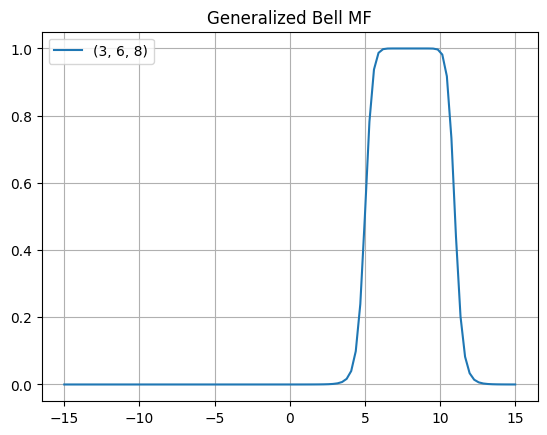

In [4]:
x3min, x3max = -15, 15
x3 = np.linspace(x3min, x3max, 100)

bellWSC = genBell(x3min, x3max)
bell = fuzz.gbellmf(x3, *bellWSC)

fig, ax = plt.subplots()
ax.plot(x3, bell, label=str(bellWSC))
ax.set_title("Generalized Bell MF")
ax.legend() 

4. Побудувати набір сігмоїдних функцій: основну односторонню, яка відкрита зліва чи справа; додаткову двосторонню; додаткову несиметричну.


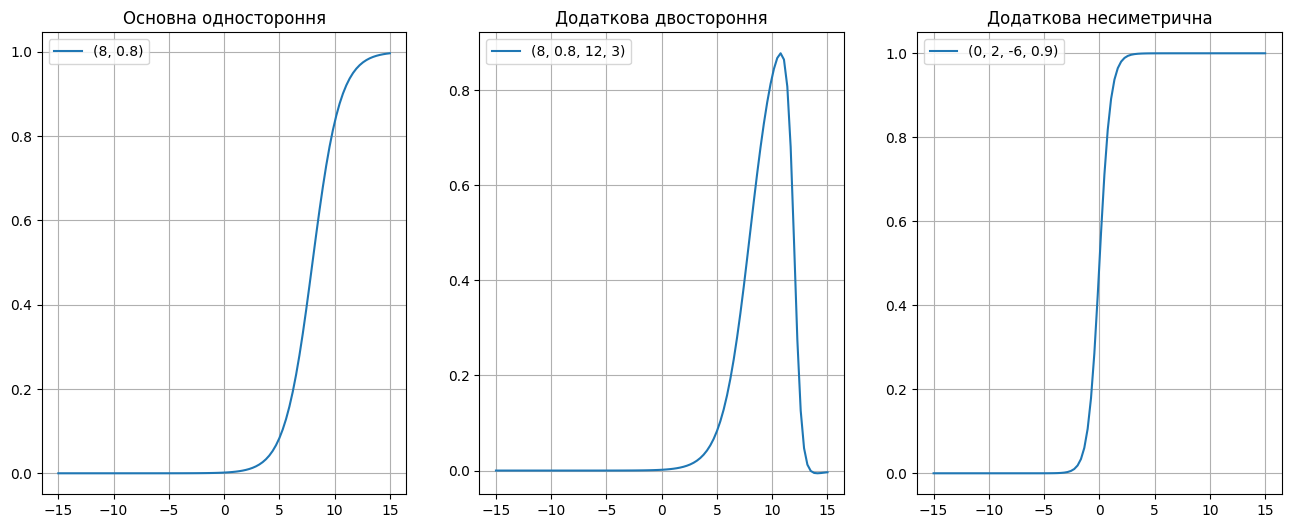

In [6]:
oneSideArr = genCenterWidth(x3min, x3max)
twoSideArr = *genCenterWidth(x3min, x3max), *genCenterWidth(x3min, x3max)
addAsymArr = *genCenterWidth(x3min, x3max), *genCenterWidth(x3min, x3max)

oneSide = fuzz.sigmf(x3, *oneSideArr)
twoSide = fuzz.dsigmf(x3, *twoSideArr)
addAsym = fuzz.psigmf(x3, *addAsymArr)

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].plot(x3, oneSide, label=str(oneSideArr))
axes[1].plot(x3, twoSide, label=str(twoSideArr))
axes[2].plot(x3, addAsym, label=str(addAsymArr))

axes[0].set_title("Основна одностороння")
axes[1].set_title("Додаткова двостороння")
axes[2].set_title("Додаткова несиметрична")

axes[0].legend()
axes[1].legend()
axes[2].legend()

5. Побудувати набір поліноміальних функцій приналежності (Z-, PI- і S-функцій).


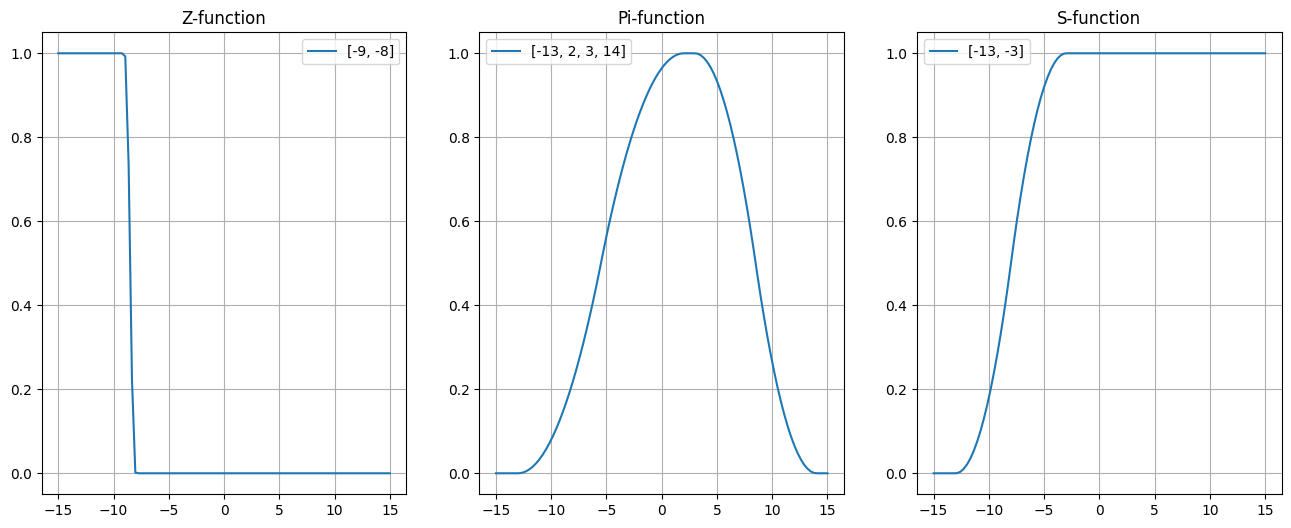

In [8]:
zArr = genrand(2, x3min, x3max)
piArr = genrand(4, x3min, x3max)
sArr = genrand(2, x3min, x3max)

z = fuzz.zmf(x3, *zArr)
pi = fuzz.pimf(x3, *piArr)
s = fuzz.smf(x3, *sArr)

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].plot(x3, z, label=str(zArr))
axes[1].plot(x3, pi, label=str(piArr))
axes[2].plot(x3, s, label=str(sArr))

axes[0].set_title("Z-function")
axes[1].set_title("Pi-function")
axes[2].set_title("S-function")

axes[0].legend()
axes[1].legend()
axes[2].legend()

6. Побудувати мінімаксну інтерпретацію логічних операторів з використанням операцій пошуку мінімуму і максимуму.


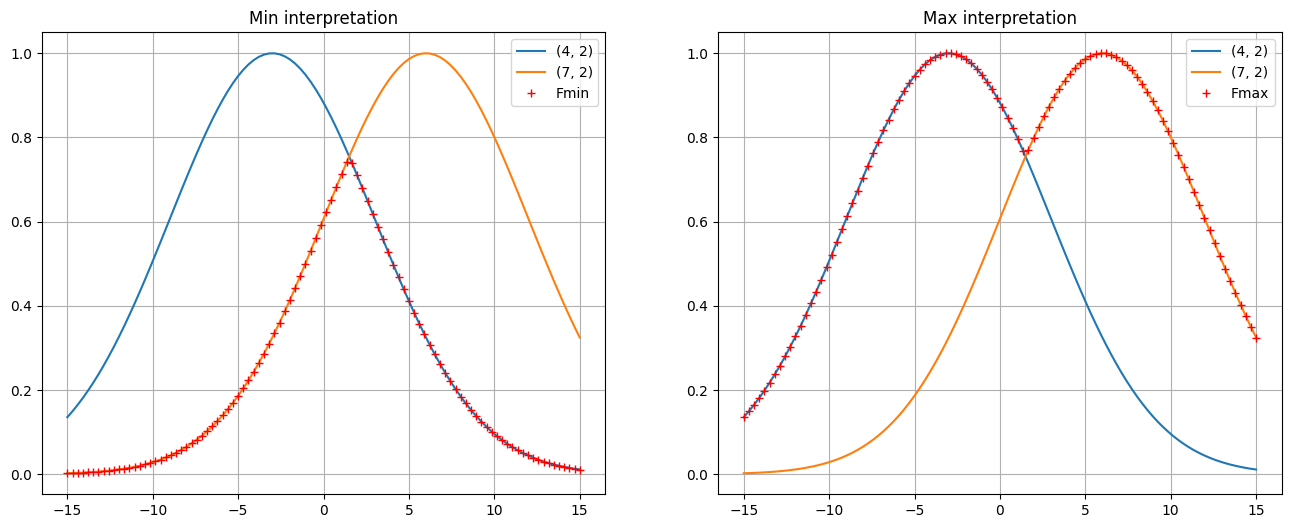

In [28]:
f1Arr = genMainSigma(x1min, x1max)
f2Arr = genMainSigma(x1min, x1max)

f1 = fuzz.gaussmf(x1, *f1Arr)
f2 = fuzz.gaussmf(x1, *f2Arr)
fmin = np.fmin(f1, f2)
fmax = np.fmax(f1, f2)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(x3, f1, label=str(f1Arr))
axes[0].plot(x3, f2, label=str(f2Arr))
axes[0].plot(x3, fmin, "r+", label="Fmin")
axes[1].plot(x3, f1, label=str(f1Arr))
axes[1].plot(x3, f2, label=str(f2Arr))
axes[1].plot(x3, fmax, "r+", label="Fmax")

axes[0].set_title("Min interpretation")
axes[1].set_title("Max interpretation")

axes[0].legend()
axes[1].legend()

plt.show()

7. Побудувати вірогідну інтерпретацію кон'юнктивну і диз'юнктивних операторів.


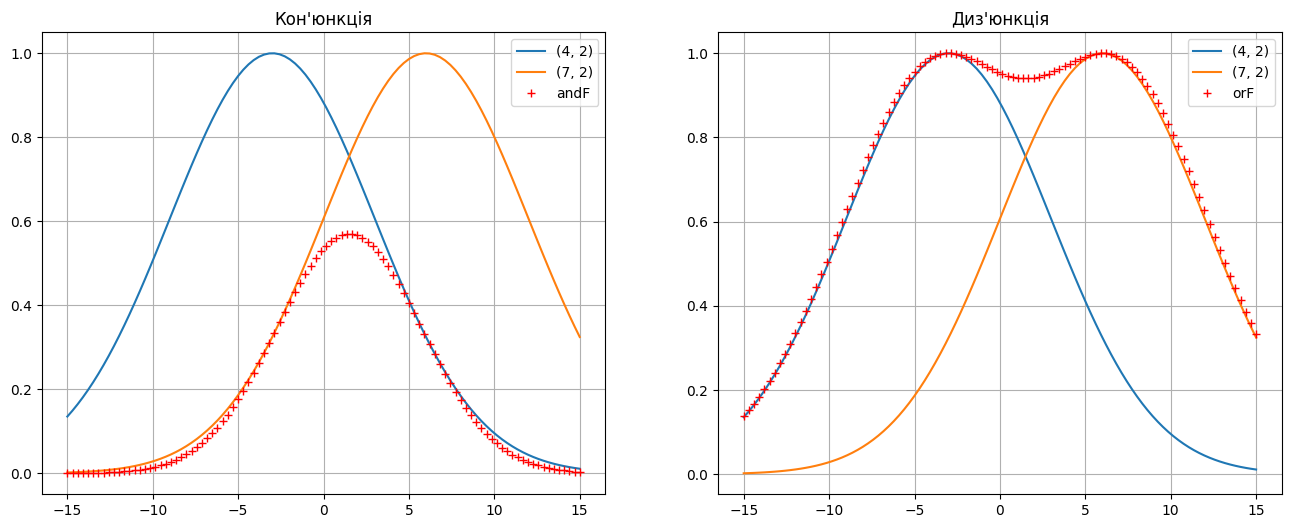

In [29]:
andF = f1 * f2
orF = f1 + f2 - andF

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(x3, f1, label=str(f1Arr))
axes[0].plot(x3, f2, label=str(f2Arr))
axes[0].plot(x3, andF, "r+", label="andF")
axes[1].plot(x3, f1, label=str(f1Arr))
axes[1].plot(x3, f2, label=str(f2Arr))
axes[1].plot(x3, orF, "r+", label="orF")

axes[0].set_title("Кон'юнкція")
axes[1].set_title("Диз'юнкція")

axes[0].legend()
axes[1].legend()

plt.show()

8. Побудувати доповнення нечіткої множини, яке описує деяке розмите судження і представляє собою математичний опис вербального вираження, який заперечує це нечітка множина.


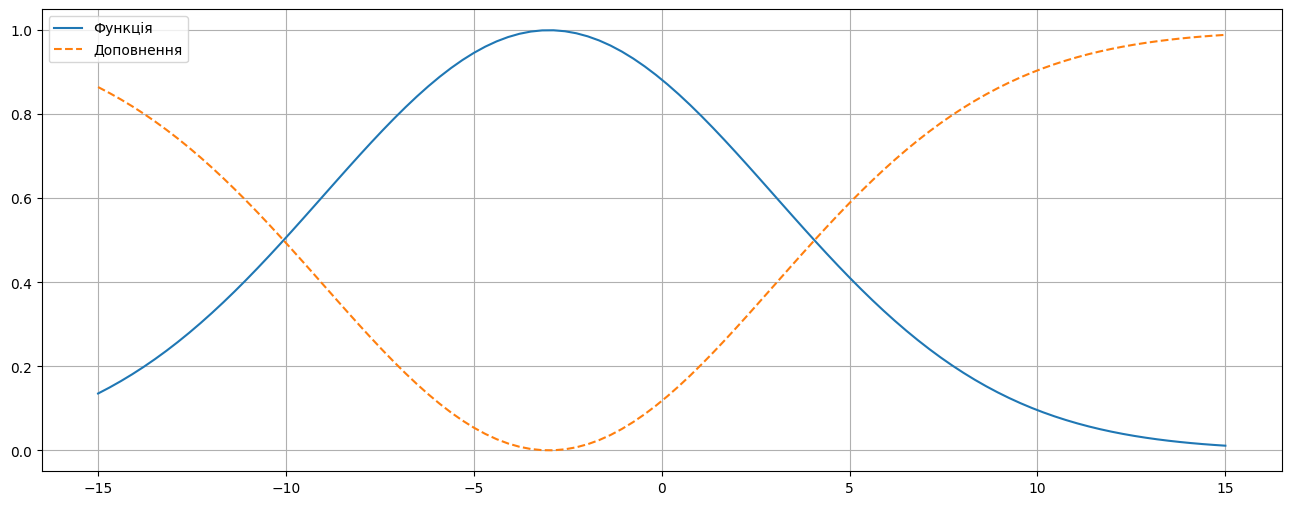

In [30]:
notF = 1 - f1

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(x3, f1, label="Функція")
ax.plot(x3, notF, "--", label="Доповнення")

plt.legend()
plt.show()